# AIT500 - Lab 1

## Objective

Practice [Pandas](https://pandas.pydata.org/docs/user_guide/index.html) data manipulation using the famous [***Iris Plants Database***](https://www.openml.org/d/61)

## Dataset Description
The *Iris Plants Database* is one of the best known database to be found in the pattern recognition literature.  The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

## Guidelines

Use material from PRG550-2022, Pandas documentation and other online sources for help

- [Lab05-Jupyter-and-Pandas.ipynb](https://github.com/dora-lee/seneca-prg550-2022-spring/blob/main/labs/Lab05-Jupyter-and-Pandas.ipynb)
- [Lecture06-Jupyter-Notes.ipynb](https://github.com/dora-lee/seneca-prg550-2022-spring/blob/main/lectures/Lecture06-Jupyter-Notes.ipynb)
- [Pandas User Guide](https://pandas.pydata.org/docs/user_guide/index.html)


# Setup Libraries

In [1]:
import pandas as pd
import os
from scipy.io.arff import loadarff
os.getcwd()

'/home/pi/workspace_ait500/labs'

# Import data

In [2]:
# run curl at command line to download local version of iris dataset to working directory
!curl https://www.openml.org/data/download/61/dataset_61_iris.arff --output iris_dataset.arff

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7487  100  7487    0     0  10945      0 --:--:-- --:--:-- --:--:-- 10961


In [3]:
# take a look at what's in the file, you can do this via command line with `less` or similar commands

!head -n 10 iris_dataset.arff
!echo "----------------------"
!tail -n 10 iris_dataset.arff

% 1. Title: Iris Plants Database
% 
% 2. Sources:
%      (a) Creator: R.A. Fisher
%      (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
%      (c) Date: July, 1988
% 
% 3. Past Usage:
%    - Publications: too many to mention!!!  Here are a few.
%    1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
----------------------
6.7,3.1,5.6,2.4,Iris-virginica
6.9,3.1,5.1,2.3,Iris-virginica
5.8,2.7,5.1,1.9,Iris-virginica
6.8,3.2,5.9,2.3,Iris-virginica
6.7,3.3,5.7,2.5,Iris-virginica
6.7,3.0,5.2,2.3,Iris-virginica
6.3,2.5,5.0,1.9,Iris-virginica
6.5,3.0,5.2,2.0,Iris-virginica
6.2,3.4,5.4,2.3,Iris-virginica
5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
raw_data = loadarff('iris_dataset.arff')

In [5]:
# create data frame from raw_data
df = pd.DataFrame(raw_data[0])

In [6]:
# show some rows of data frame
df.head(4)

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,b'Iris-setosa'
1,4.9,3.0,1.4,0.2,b'Iris-setosa'
2,4.7,3.2,1.3,0.2,b'Iris-setosa'
3,4.6,3.1,1.5,0.2,b'Iris-setosa'


# Lab Questions

Using Pandas functionality to answer the following questions

## Q1 Show the column names of the dataset and their data types

In [7]:
df.columns

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class'], dtype='object')

In [8]:
df.dtypes

sepallength    float64
sepalwidth     float64
petallength    float64
petalwidth     float64
class           object
dtype: object

## Q2 Show the number of rows in the dataset

In [9]:
df.shape[0]

150

## Q3 Data cleaning: create field called `class_clean` by remove the leading `b'` and trailing `'` from the `class` field

In [10]:
repl = lambda m: m.group(1)
df['class_clean'] = df['class'].astype('str').str.extract(r"b'(.*)'") # cast as string to convert byte string

df.head(5)

,sepallength,sepalwidth,petallength,petalwidth,class,class_clean
0,5.1,3.5,1.4,0.2,b'Iris-setosa',Iris-setosa
1,4.9,3.0,1.4,0.2,b'Iris-setosa',Iris-setosa
2,4.7,3.2,1.3,0.2,b'Iris-setosa',Iris-setosa
3,4.6,3.1,1.5,0.2,b'Iris-setosa',Iris-setosa
4,5.0,3.6,1.4,0.2,b'Iris-setosa',Iris-setosa


## Q4 Show the number of data entries for each `class_clean`

In [11]:
df.groupby('class_clean').count()

,sepallength,sepalwidth,petallength,petalwidth,class
class_clean,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


## Q5 Recreate this plot
<img src="lab01_chart01.png">

<AxesSubplot:xlabel='petallength', ylabel='sepalwidth'>

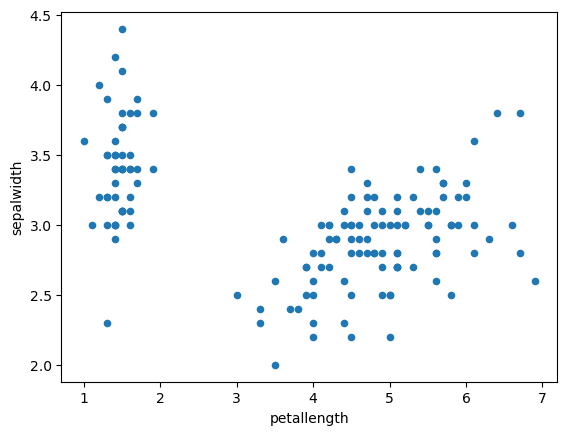

In [12]:
df.plot.scatter(x='petallength', y='sepalwidth')

## Q6 Recreate this plot
<img src="lab01_chart02.png">

<AxesSubplot:xlabel='petalwidth', ylabel='sepalwidth'>

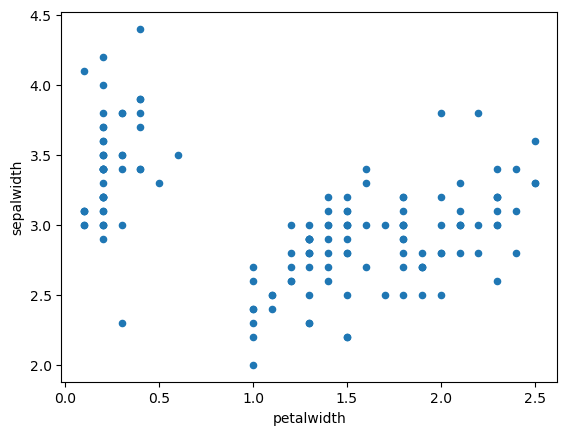

In [24]:
df.plot.scatter(x='petalwidth', y='sepalwidth')

## Q7 Recreate this plot  and provide your observations of its shortcomings or limitations of the charts in Q5, Q6, Q7
<img src="lab01_chart03.png">

<AxesSubplot:xlabel='sepallength', ylabel='sepalwidth'>

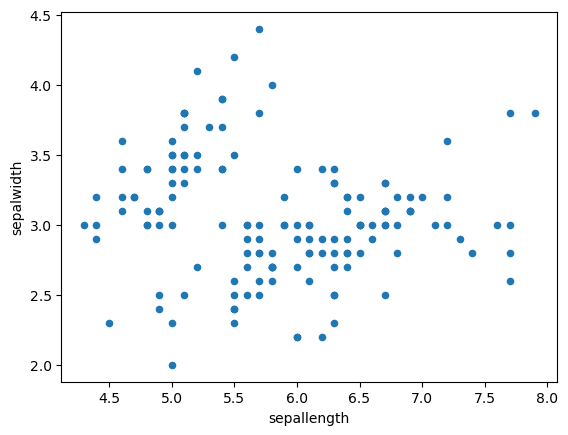

In [14]:
df.plot.scatter(x='sepallength', y='sepalwidth')

## Q7 Written Answer:
The dataset contains 4 variables, each chart in Q5, Q6, Q7 shows only 2 variables at a time.  This makes it difficult to explore how the all the variables change with respect to each other.  For example, it is difficult to examine how sepalwidth changes with sepallength, petalwidth, and petallength


## Q8 Recreate this plot, provide written description of information you gained from the plot and why it's useful
<img src="lab01_chart04.png">

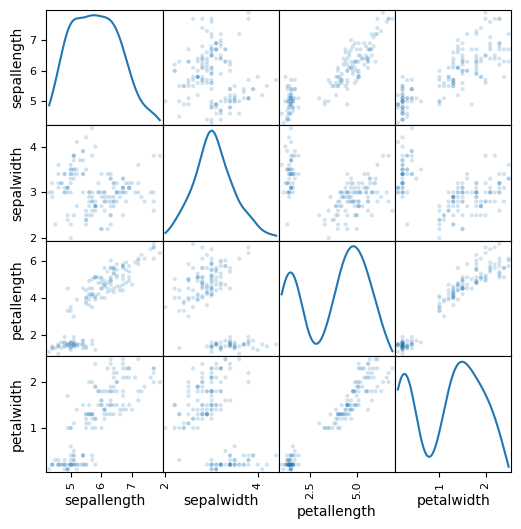

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal="kde");

## Q8 Written Answer:
The scatter matrix plot creates and displays together the scatter plots for all pair-wise combinations of features in a dataset.

For the Iris dataset features (sepallength,sepalwidth,petallength,petalwidth) `scatter_matrix` creates 6 pairs of plots:
1. sepallength vs sepalwidth
1. sepallength vs petallength
1. sepallength vs petalwidth
1. sepalwidth vs petallength
1. sepalwidth vs petalwidth
1. petallength vs petalwidth


The diagonal charts show the distribution of data points for the feature along the x-axis (or y-axis)
For example, the lower right corner shows that the datapoints for `petalwidth` are separated into two groups (if you squint, you can see there is a gap between 0.6-1.0

Visualizing pairs of features this way can help you identify patterns, detect relationships between features, and help you determine which features are most useful for building an ML model

## Q9 What is the mean, standard deviation, min, max for each of the numerical fields of the dataset?

In [16]:
df.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Q10 How many entries have `petalwidth`>2?

In [17]:
df.loc[df['petalwidth']>2].count()

sepallength    23
sepalwidth     23
petallength    23
petalwidth     23
class          23
class_clean    23
dtype: int64

## Q11How many entries have `petallength`<4?

In [18]:
df.loc[df['petallength']<4].count()

sepallength    61
sepalwidth     61
petallength    61
petalwidth     61
class          61
class_clean    61
dtype: int64

## Q12 How many entries have `sepallength`<5 and 'sepalwidth'>3?

In [19]:
df.loc[(df['sepallength']<5) & (df['sepalwidth']>3)].count()

sepallength    13
sepalwidth     13
petallength    13
petalwidth     13
class          13
class_clean    13
dtype: int64

## Q13 How many entries have `sepallength`>6 and `petalwidth`>3?

In [20]:
df.loc[(df['sepallength']>6) & (df['petalwidth']>3)].count()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
class_clean    0
dtype: int64

## Q14 Recreate this plot and provide a written interpretation of what you see
<img src="lab01_chart05.png">

In [21]:
colours = ['red', 'blue','orange']
class_names = df.class_clean.unique().tolist()
print(class_names)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


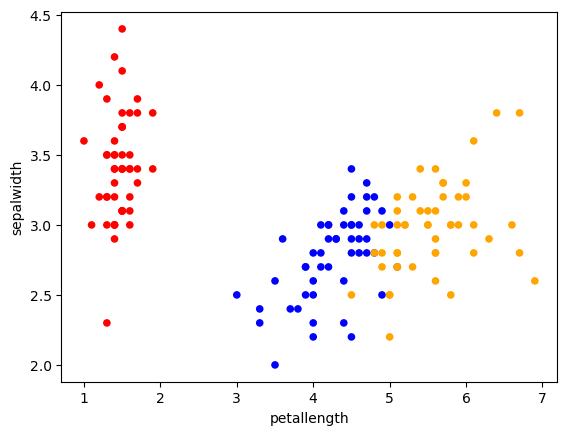

In [22]:

colour_map = {}
for idx, c in enumerate(df.class_clean.unique()):
    colour_map[c]=colours[idx]

def get_class_colour(s):
    return colour_map[s]

df['class_colour'] = df['class_clean'].apply(get_class_colour)
xx = df.plot.scatter(x='petallength', y='sepalwidth', c='class_colour')

## Q14 Written Answer:
This scatter plot uses colour to distinguish data points belonging to each class
Compared to the chart in Q5, this version shows us that the left-most data points belong to 'Iris-setosa', the middle are mostly 'Iris-versicolor', and 'Iris-virginica' datapoints lie mostly towards the right when ordered by `petallength`



## Q15 Recreate this plot and provide an interpretation of the chart
<img src="lab01_chart06.png">

1. what does the box upper and lower bound represent?
1. what do the whiskers represent?
1. what does the green line represent?

<AxesSubplot:>

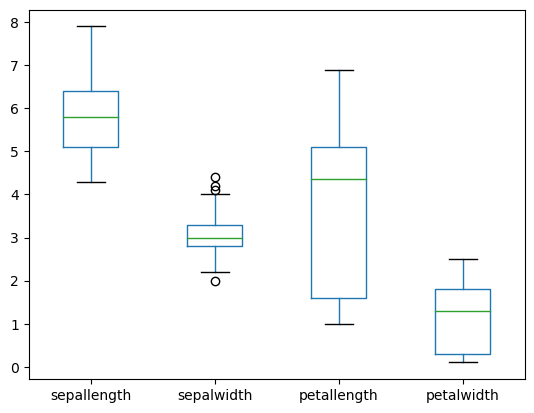

In [23]:
df.loc[:,['sepallength', 'sepalwidth', 'petallength', 'petalwidth']].plot.box()

## Q15 Written Answer:
The chart is a boxplot and is another way of showing how datapoints for a particular feature are distributed

1. the upper and lower box boundary show the 1st and 3rd quartiles respectively for each feature.  Within the box lies 50% of the datapoints
2. the whiskers represent the maximum and minimum extent of the feature.  Depending on the library/method, they can be:
   - the min() and max() of the feature, or
   - the datapoint closest to 1.5 * IQR *above the upper quartile* and the datapoint closest to 1.5 * IQR *below the lower quartile*
   - the IQR is the distance between the upper and lower quartile in #Q15.1
4. the green line shows median - half of a feature's data points lie above the line and half lie below